In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# transrate scores
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_scores_imicrobe_cds.csv"
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"
ncgr_transrate_score = pd.read_csv(file_ncgr_transrate_scores, index_col='SampleName')
dib_transrate_score = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')

In [3]:
dib_transrate_score = dib_transrate_score.drop_duplicates()
ncgr_transrate_score = ncgr_transrate_score.drop_duplicates()

In [4]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_score.index) #special flowers are missing
ncnc=set(ncgr_transrate_score.index)
len(ddd.intersection(ncnc))

627

In [43]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='gray', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.80, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    return newdf, fig, ax

def violin_split(df, col1, col2, fig, ax, color2='gray', color1='blue', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    ax.set_axis_bgcolor('white')
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(8,8)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

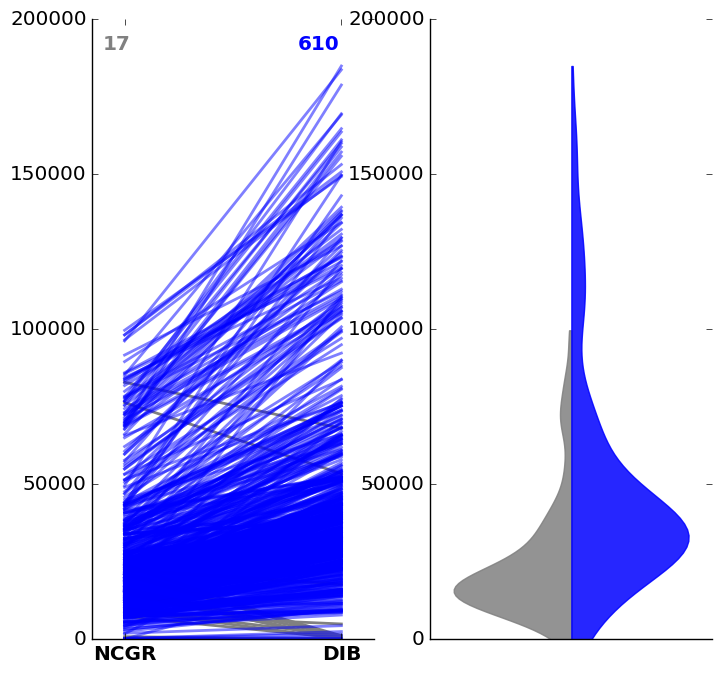

In [44]:
score,fig, ax = create_plots(ncgr_transrate_score,dib_transrate_score, 'n_seqs', '',ymax=200000, ypos=190000)
savefig('n_seqs.png')

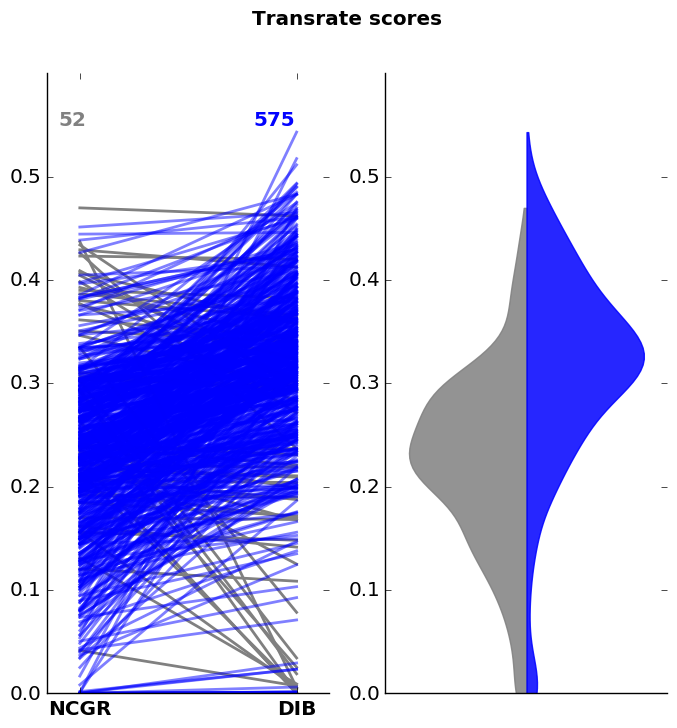

In [45]:
score,fig, ax = create_plots(ncgr_transrate_score,dib_transrate_score, 'score', 'Transrate scores',ymax=.6, ypos=0.55)
savefig('transrate.png')

Figure 1. Transrate scores of DIB assemblies are higher than NCGR assemblies. (Left) The majority of DIB scores are higher than NCGR scores. Gray lines indicate NCGR score is higher. Blue lines indicate DIB scores are higher. (Right) The mean of DIB scores (blue) is higher than the mean of NCGR scores (gray).  

In [8]:
score[score['NCGR']>score['DIB']]

,NCGR,DIB
SampleName,,
MMETSP1057,0.29300,0.00092
MMETSP0912,0.13097,0.00917
MMETSP0754,0.22723,0.00000
MMETSP1126,0.15602,0.00547
MMETSP0977,0.24040,0.23100
MMETSP0908,0.21695,0.21058
MMETSP0907,0.20640,0.20406
MMETSP0329,0.29359,0.01900
MMETSP0469,0.38013,0.36351
